In [12]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from matplotlib import pyplot as plt
import seaborn as sns

CR_COLOR = "#0079FF"


In [13]:
df_2022 = pd.read_csv("../data/2022-23_reg_season_clean.csv")
df_2023 = pd.read_csv("../data/2023-24_reg_season_clean.csv")


# main df
# df = df_2022.copy()
df = df_2023.copy()

# convert to date type
df["game_time"] = pd.to_datetime(df["game_time"])
df["date"] = pd.to_datetime(df["date"])

print(df_2022.shape)
print(df_2023.shape)
df.head()

(2460, 70)
(2400, 70)


,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,America/Chicago,-1,845,44.980,93.276,0,1,0,0,33.757,84.396,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,87.917,43.045,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,America/New_York,0,46,38.898,77.021,0,1,0,0,33.757,84.396,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,84.396,33.757,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182


In [14]:
# mark the week of season
df['week_number'] = df['date'].dt.isocalendar().week
df['week_of_season'] = np.where(df['week_number'] >= 43, df['week_number'] - 42, df['week_number'] + 1 +(df['week_number'].max() - df['week_number'][0]))

df['team_game_id'] = df.groupby('abbreviation').cumcount() + 1
df.head()

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff,week_number,week_of_season,team_game_id
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193,43,1,1
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127,43,1,2
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853,43,1,3
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,America/Chicago,-1,845,44.980,93.276,0,1,0,0,33.757,84.396,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,87.917,43.045,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487,44,2,4
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,America/New_York,0,46,38.898,77.021,0,1,0,0,33.757,84.396,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,84.396,33.757,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182,44,2,5


In [15]:
# mark the first game after the 12/2
# after_cup_dict = df[df['date'].gt("2023-12-15")].groupby('team_name').first()['team_game_id'].to_dict()
# after_cup_dict

after_cup_dict = df[df['date'].gt("2023-12-02")].groupby('abbreviation').first()['team_game_id'].to_dict()
# after_cup_dict

df['after_id'] = df['abbreviation'].map(after_cup_dict)
df['is_first_after_cup'] = np.where(df['team_game_id'] == df['after_id'], 1, 0)
# df['distance_from_previous_game'] = np.where(df['is_first_after_cup'] == 1, 0, df['distance_from_previous_game'])
# df[['team', 'date', 'team_game_id',"is_home_game", "opponent", 'distance_from_previous_game', 'is_first_after_cup']].head(30)

In [16]:
# after_cup_dict

In [17]:
df.head(3)

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff,week_number,week_of_season,team_game_id,after_id,is_first_after_cup
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193,43,1,1,20,0
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127,43,1,2,20,0
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853,43,1,3,20,0


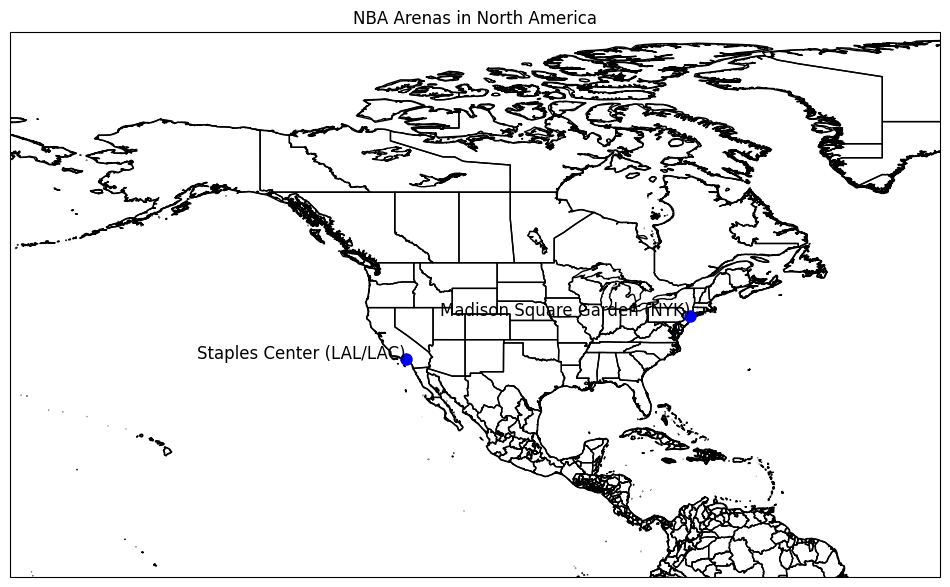

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the latitude and longitude limits for North America
north_america_extent = [-180, -35, 0, 85]  # [lon_min, lon_max, lat_min, lat_max]

# Create a figure and axis with a projection for North America
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 9))

# Set the extent of the map to cover North America
ax.set_extent(north_america_extent, crs=ccrs.PlateCarree())

# Add a background map with coastlines, countries, and states
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('10m'))

# Define the coordinates of NBA arenas (latitude and longitude)
nba_arenas = {
    'Staples Center (LAL/LAC)': (34.0431, -118.2670),
    'Madison Square Garden (NYK)': (40.7505, -73.9934),
    # Add more arenas here
}

# Plot NBA arenas on the map
for arena, (lat, lon) in nba_arenas.items():
    ax.plot(lon, lat, 'bo', markersize=8)
    ax.text(lon, lat, arena, fontsize=12, ha='right')

# Set the title
plt.title('NBA Arenas in North America')

# Show the plot
plt.show()


In [19]:
assert False

AssertionError: 

In [ ]:
# df['is_post_nba_cup'].unique()

In [ ]:
# df.columns

In [ ]:
assert False

In [ ]:
# total travel for each team (simple)
piv = df.pivot_table(
    index=["season_start_year","abbreviation", "team"],
    values="distance_from_previous_game",
    aggfunc="sum"
    
).sort_values(by="distance_from_previous_game").reset_index()
piv['team'] = piv['team'].str.split(" ").str[-1]
print(piv.shape)
# piv
# ax = piv.plot(
#     kind="bar",
#     x="abbreviation",
#     legend=False,
#     title="Total Distance traveled by each team for the 2023 Season",
#     ylabel="Miles",
#     xlabel="Team",
#     # grid='y',
#     figsize=(8,4)
# )
# ax.grid(axis="y")
piv.head(2)


(30, 4)


,season_start_year,abbreviation,team,distance_from_previous_game
0,2023,CLE,Cavaliers,31398.561368
1,2023,IND,Pacers,32437.688911
